STATISTICAL ANALYSIS FOR LOBE-SPECIFIC PERFORMANCE

Dataset: RepOD Dataset

1. DESCRIPTIVE STATISTICS (Mean ± SD)
--------------------------------------------------
Full        : 99.82 ± 0.14%
Frontal     : 97.02 ± 0.36%
Temporal    : 96.37 ± 0.70%
Central     : 91.19 ± 0.84%
Parietal    : 90.90 ± 0.22%
Occipital   : 79.30 ± 8.02%

2. ONE-WAY ANOVA (Comparing all brain regions)
--------------------------------------------------
F-statistic: 38.4810
P-value: 0.000000
Result: Significant difference exists between brain regions (p < 0.05)

3. PAIRED T-TESTS (Frontal vs. Other Lobes)
--------------------------------------------------

Frontal vs Temporal:
  t-statistic: 2.2829
  p-value: 0.048336
  Mean difference: 0.65%
  95% CI: [0.01, 1.30]
  Significant: Yes (p < 0.05)

Frontal vs Central:
  t-statistic: 22.1722
  p-value: 0.000000
  Mean difference: 5.84%
  95% CI: [5.24, 6.43]
  Significant: Yes (p < 0.05)

Frontal vs Parietal:
  t-statistic: 59.5866
  p-value: 0.000000
  Mean differ

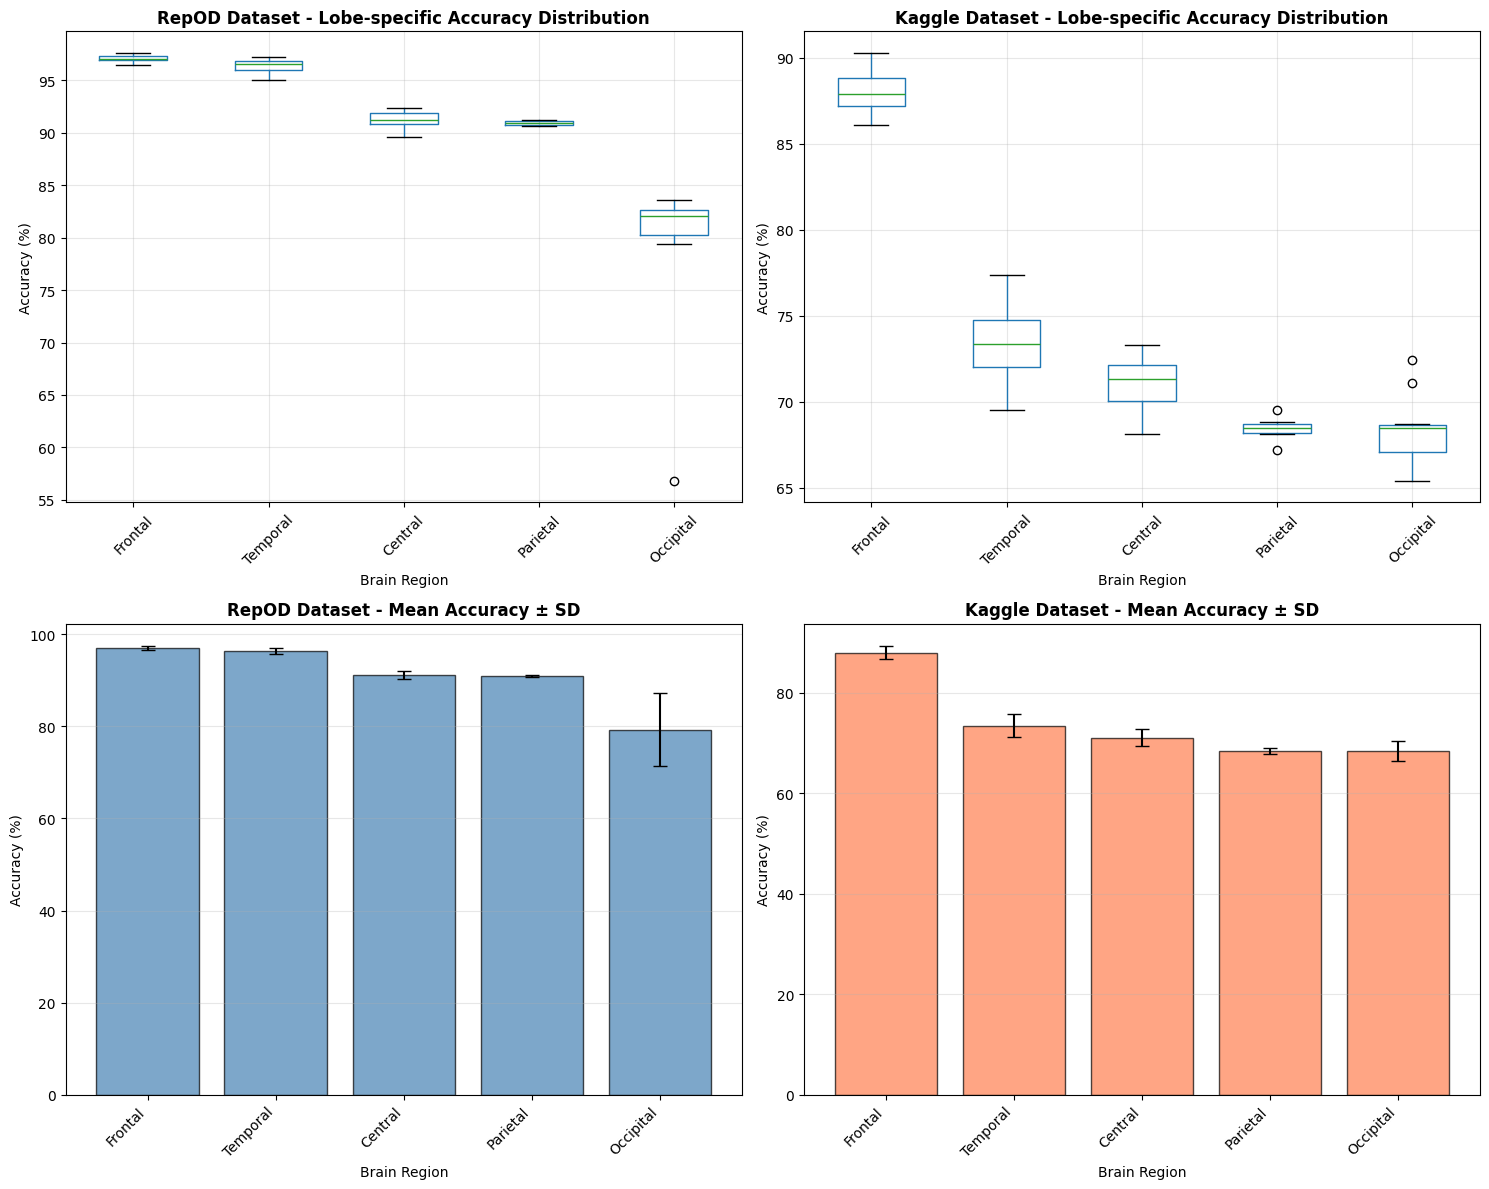

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway, ttest_rel, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Example data structure - Replace with your actual accuracy/F1 scores
# Each row represents one fold of cross-validation
# Columns represent different brain regions

# RepOD Dataset - Replace these with your actual values from 10-fold CV
repod_data = {
    'Full': [99.9, 99.9, 99.9, 99.9, 99.58, 99.79, 99.58, 99.79, 99.90, 100],
    'Frontal': [96.46, 97.29, 96.98, 97.40, 96.88, 96.88, 97.61, 97.19, 96.57, 96.98],
    'Temporal': [96.36, 95.01, 96.25, 96.67, 97.09, 96.77, 95.63, 97.19, 96.88, 95.88],
    'Central': [91.05, 90.74, 91.36, 92.30, 91.99, 91.68, 91.05, 90.22, 89.59, 91.88],
    'Parietal': [90.8, 91.1, 90.6, 91.0, 91.2, 90.7, 90.9, 91.1, 90.6, 91.0],
    'Occipital': [80.75, 82.73, 79.40, 82.31, 83.56, 83.25, 82.10, 80.02, 82.10, 56.82]
}

# Kaggle Dataset - Replace with your actual values
kaggle_data = {
    'Full': [98.21, 98.47, 98.95, 98.30, 98.5, 98.01, 98.45, 98.4, 98.91, 98.37],
    'Frontal': [89.0, 90.3, 87.72, 88.11, 88.4, 86.8, 87.0, 89.31, 87.7, 86.11],
    'Temporal': [71.4, 71.7, 73.1, 73.5, 75.8, 73.2, 77.4, 73.7, 75.1, 69.5],
    'Central': [73.0, 71.3, 71.7, 68.1, 71.4, 69.8, 72.3, 73.3, 70.7, 69.1],
    'Parietal': [68.4, 68.7, 68.1, 69.5, 68.8, 67.2, 68.4, 68.7, 68.1, 68.5],
    'Occipital': [68.3, 68.6, 67.0, 65.4, 68.7, 71.1, 67.3, 68.6, 67.0, 72.4]
}

# Convert to DataFrames
df_repod = pd.DataFrame(repod_data)
df_kaggle = pd.DataFrame(kaggle_data)

print("="*70)
print("STATISTICAL ANALYSIS FOR LOBE-SPECIFIC PERFORMANCE")
print("="*70)

# Function to perform statistical tests
def analyze_lobe_performance(df, dataset_name):
    print(f"\n{'='*70}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*70}")

    # 1. Descriptive Statistics
    print("\n1. DESCRIPTIVE STATISTICS (Mean ± SD)")
    print("-" * 50)
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        print(f"{column:12s}: {mean:.2f} ± {std:.2f}%")

    # 2. One-way ANOVA (comparing all lobes)
    print("\n2. ONE-WAY ANOVA (Comparing all brain regions)")
    print("-" * 50)
    # Exclude 'Full' for lobe comparison
    lobe_columns = [col for col in df.columns if col != 'Full']
    lobe_data = [df[col].values for col in lobe_columns]

    f_stat, p_value = f_oneway(*lobe_data)
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.6f}")

    if p_value < 0.05:
        print("Result: Significant difference exists between brain regions (p < 0.05)")
    else:
        print("Result: No significant difference between brain regions (p >= 0.05)")

    # 3. Paired t-tests (comparing frontal with each other lobe)
    print("\n3. PAIRED T-TESTS (Frontal vs. Other Lobes)")
    print("-" * 50)
    frontal = df['Frontal'].values

    comparisons = []
    for col in lobe_columns:
        if col != 'Frontal':
            other_lobe = df[col].values
            t_stat, p_val = ttest_rel(frontal, other_lobe)

            # Calculate 95% confidence interval for mean difference
            diff = frontal - other_lobe
            mean_diff = np.mean(diff)
            se_diff = stats.sem(diff)
            ci = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=se_diff)

            comparisons.append({
                'Comparison': f'Frontal vs {col}',
                't-statistic': t_stat,
                'p-value': p_val,
                'Mean Diff': mean_diff,
                'CI Lower': ci[0],
                'CI Upper': ci[1],
                'Significant': 'Yes' if p_val < 0.05 else 'No'
            })

            print(f"\nFrontal vs {col}:")
            print(f"  t-statistic: {t_stat:.4f}")
            print(f"  p-value: {p_val:.6f}")
            print(f"  Mean difference: {mean_diff:.2f}%")
            print(f"  95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")
            print(f"  Significant: {'Yes (p < 0.05)' if p_val < 0.05 else 'No (p >= 0.05)'}")

    # 4. Post-hoc pairwise comparisons (Bonferroni correction)
    print("\n4. POST-HOC PAIRWISE COMPARISONS (with Bonferroni correction)")
    print("-" * 50)
    n_comparisons = len(lobe_columns) * (len(lobe_columns) - 1) / 2
    bonferroni_alpha = 0.05 / n_comparisons
    print(f"Adjusted significance level (Bonferroni): {bonferroni_alpha:.6f}")
    print()

    for i, col1 in enumerate(lobe_columns):
        for col2 in lobe_columns[i+1:]:
            t_stat, p_val = ttest_rel(df[col1].values, df[col2].values)
            sig = "Yes" if p_val < bonferroni_alpha else "No"
            print(f"{col1} vs {col2}: t={t_stat:.4f}, p={p_val:.6f}, Sig={sig}")

    return pd.DataFrame(comparisons)

# Analyze both datasets
comparison_repod = analyze_lobe_performance(df_repod, "RepOD Dataset")
comparison_kaggle = analyze_lobe_performance(df_kaggle, "Kaggle Dataset")

# Visualization
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS...")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# RepOD boxplot
ax1 = axes[0, 0]
df_repod_plot = df_repod[[col for col in df_repod.columns if col != 'Full']]
df_repod_plot.boxplot(ax=ax1)
ax1.set_title('RepOD Dataset - Lobe-specific Accuracy Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=10)
ax1.set_xlabel('Brain Region', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Kaggle boxplot
ax2 = axes[0, 1]
df_kaggle_plot = df_kaggle[[col for col in df_kaggle.columns if col != 'Full']]
df_kaggle_plot.boxplot(ax=ax2)
ax2.set_title('Kaggle Dataset - Lobe-specific Accuracy Distribution', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=10)
ax2.set_xlabel('Brain Region', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# RepOD bar plot with error bars
ax3 = axes[1, 0]
means_repod = df_repod_plot.mean()
stds_repod = df_repod_plot.std()
x_pos = np.arange(len(means_repod))
ax3.bar(x_pos, means_repod, yerr=stds_repod, capsize=5, alpha=0.7, color='steelblue', edgecolor='black')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(means_repod.index, rotation=45, ha='right')
ax3.set_title('RepOD Dataset - Mean Accuracy ± SD', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontsize=10)
ax3.set_xlabel('Brain Region', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Kaggle bar plot with error bars
ax4 = axes[1, 1]
means_kaggle = df_kaggle_plot.mean()
stds_kaggle = df_kaggle_plot.std()
x_pos = np.arange(len(means_kaggle))
ax4.bar(x_pos, means_kaggle, yerr=stds_kaggle, capsize=5, alpha=0.7, color='coral', edgecolor='black')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(means_kaggle.index, rotation=45, ha='right')
ax4.set_title('Kaggle Dataset - Mean Accuracy ± SD', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy (%)', fontsize=10)
ax4.set_xlabel('Brain Region', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('lobe_statistical_comparison.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'lobe_statistical_comparison.png'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
print("\nIMPORTANT NOTES:")
print("1. Replace the example data with your actual 10-fold CV results")
print("2. If p < 0.05, the difference is statistically significant")
print("3. Bonferroni correction adjusts for multiple comparisons")
print("4. Report these statistics in your paper to support your claims")
print("="*70)